In [2]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir("C:/Users/오원석/user_name/elo-merchant-category-recommendation"))

['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
train=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/train.csv")

In [4]:
history_trans = pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv")

In [5]:
history_reader = pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv", chunksize = 10)
type(history_reader)

pandas.io.parsers.TextFileReader

In [6]:
hist_chunk = None

In [7]:
for chunk in history_reader:
    hist_chunk = chunk
    print(hist_chunk)
    break

  authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   
5               Y  C_ID_4e6213e9bc      333          N             0   
6               Y  C_ID_4e6213e9bc       88          N             0   
7               Y  C_ID_4e6213e9bc        3          N             0   
8               Y  C_ID_4e6213e9bc       88          N             0   
9               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2        

In [8]:
type(hist_chunk)


pandas.core.frame.DataFrame

In [9]:
history_columns = list(hist_chunk.columns)
print(history_columns)

['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments', 'category_3', 'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2', 'state_id', 'subsector_id']


In [10]:
hist_chunk.dtypes


authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [11]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2   
    for col in df.columns:
        col_type = df[col].dtypes
        if df[col].dtypes == 'object':
            df[col] = df[col].astype('category')
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)   
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [12]:
import gc

In [13]:
hist_trans = reduce_mem_usage(history_trans)
gc.collect()

Mem. usage decreased to 1622.97 Mb (47.8% reduction)


47

In [14]:
hist_trans.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [15]:
hist_trans.shape

(29112361, 14)

In [16]:
hist_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

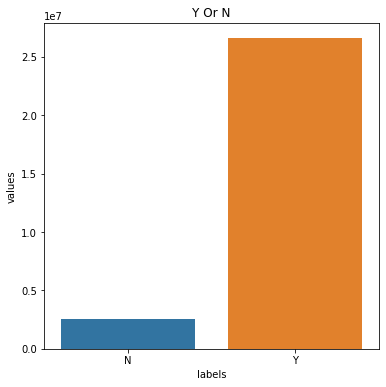

In [17]:
temp = hist_trans["authorized_flag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

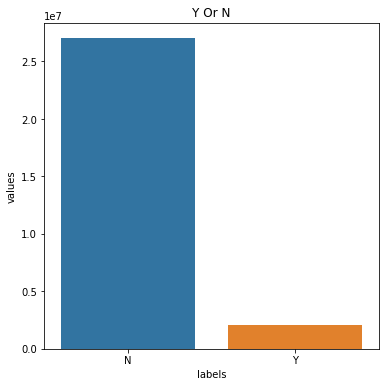

In [18]:
temp = hist_trans["category_1"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

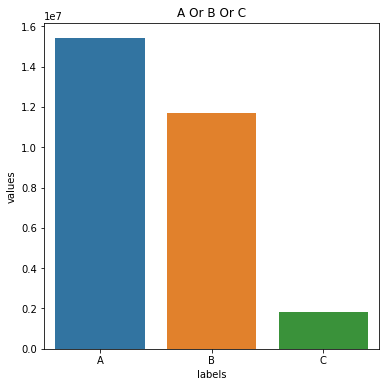

In [19]:
temp = hist_trans["category_3"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('A Or B Or C')
sns.barplot(x='labels', y='values', data=df)
plt.show()

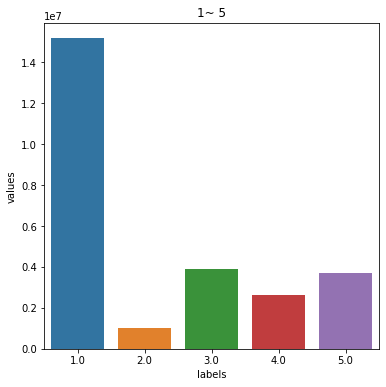

In [20]:
temp = hist_trans["category_2"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

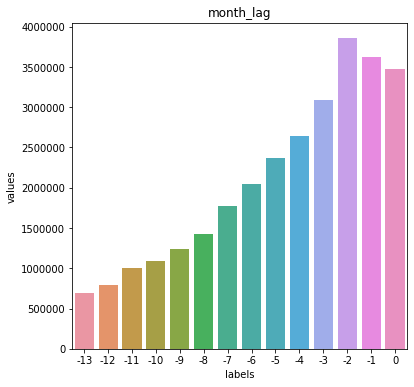

In [21]:
temp = hist_trans["month_lag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('month_lag')
sns.barplot(x='labels', y='values', data=df)
plt.show()

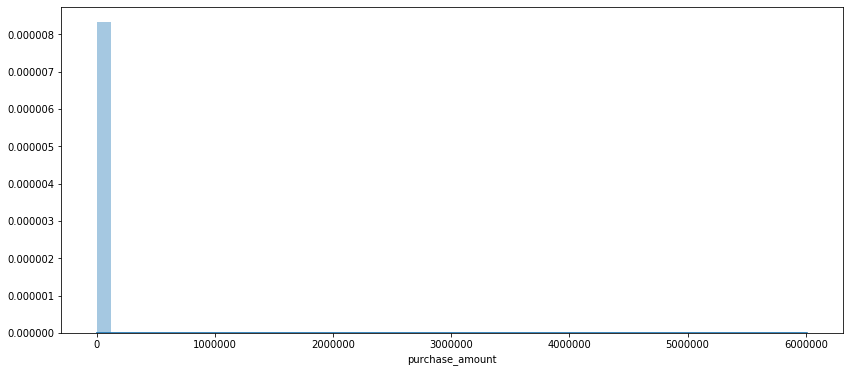

In [22]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(hist_trans['purchase_amount'])

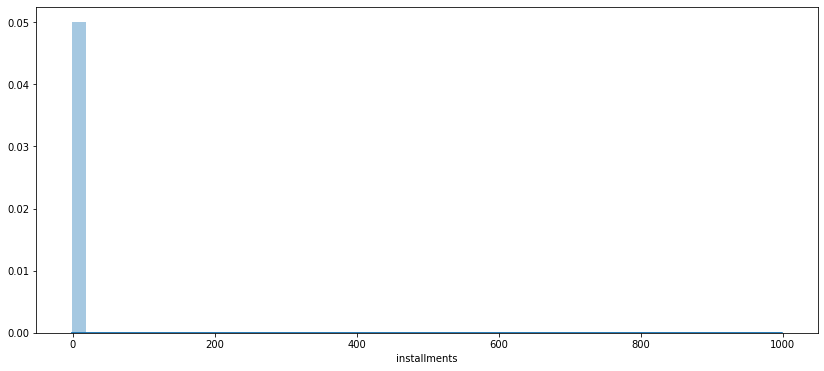

In [23]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(hist_trans['installments'])

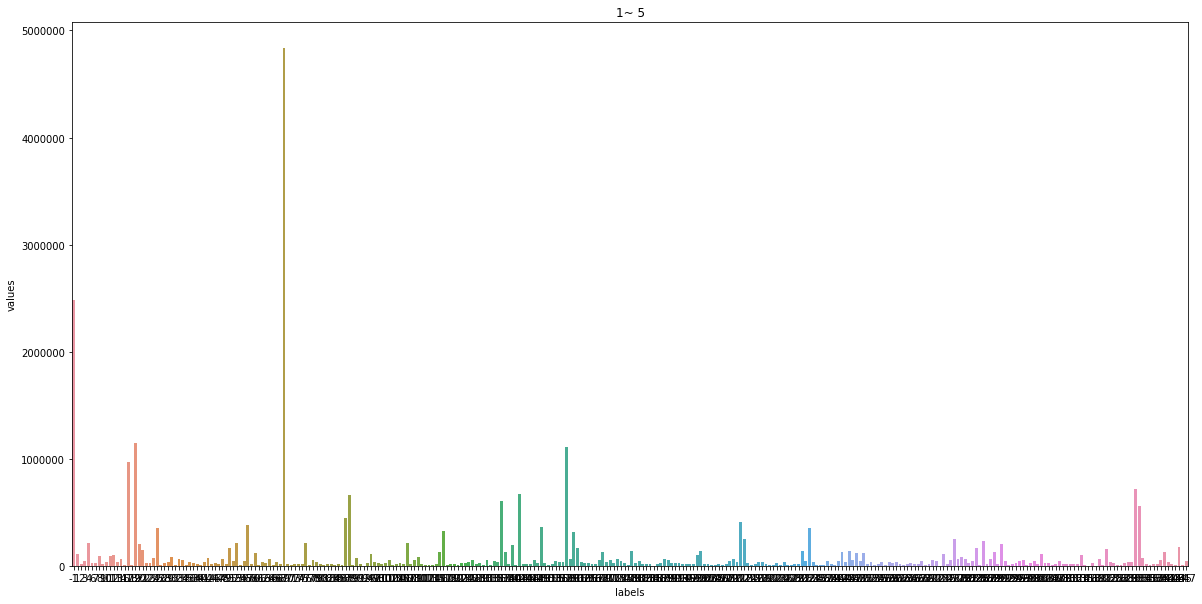

In [24]:
temp = hist_trans["city_id"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(20,10))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

In [25]:
hist_trans['authorized_flag']=history_trans['authorized_flag'].map({'Y':1, 'N':0})
hist_trans['category_1']=history_trans['category_1'].map({'Y':1, 'N':0})

In [26]:
hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,1,C_ID_4e6213e9bc,88,0,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,1,C_ID_4e6213e9bc,88,0,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [27]:
total = hist_trans.isnull().sum().sort_values(ascending = False)
percent = (hist_trans.isnull().sum()/hist_trans.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
category_2,2652864,9.112500
category_3,178159,0.611970
merchant_id,138481,0.475678
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


In [28]:
def aggregate_historical_transactions(history):
   
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
   
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip()
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
   
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
   
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
   
    return agg_history

history = aggregate_historical_transactions(hist_trans)
del hist_trans
gc.collect()

C:\anaconda_c\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


63816

In [29]:
history_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-8,-0.703331,1.498405e+09,1.0,16,37
1,1,C_ID_4e6213e9bc,88,0,0,A,367,M_ID_86ec983688,-7,-0.733128,1.500121e+09,1.0,16,16
2,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_979ed661fc,-6,-0.720386,1.502316e+09,1.0,16,37
3,1,C_ID_4e6213e9bc,88,0,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,1.504347e+09,1.0,16,34
4,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-11,-0.722865,1.489108e+09,1.0,16,37


In [30]:
train = pd.merge(train, history, on='card_id', how='left')

In [31]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,...,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,247,0.950000,94,...,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,339,0.968571,142,...,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,41,0.953488,13,...,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,77,1.000000,50,...,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,128,0.962406,66,...,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0


In [32]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'hist_transactions_count', 'hist_authorized_flag_sum',
       'hist_authorized_flag_mean', 'hist_merchant_id_nunique',
       'hist_city_id_nunique', 'hist_purchase_amount_sum',
       'hist_purchase_amount_median', 'hist_purchase_amount_max',
       'hist_purchase_amount_min', 'hist_purchase_amount_std',
       'hist_installments_sum', 'hist_installments_median',
       'hist_installments_max', 'hist_installments_min',
       'hist_installments_std', 'hist_purchase_date_ptp', 'hist_month_lag_min',
       'hist_month_lag_max'],
      dtype='object')

In [33]:
test=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/test.csv")

In [34]:
test = pd.merge(test, history, on='card_id', how='left')

In [35]:
test.head()


,first_active_month,card_id,feature_1,feature_2,feature_3,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,...,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,44,0.647059,24,7,...,-0.743903,0.192268,141,1.0,12,1,2.061127,23179380.0,-8,0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,77,0.987179,27,4,...,-0.731881,0.154999,83,1.0,4,1,0.405794,34667913.0,-13,0
2,2017-08,C_ID_b709037bc5,5,1,1,13,9,0.692308,9,4,...,-0.536537,0.906547,44,4.0,10,-1,3.686427,13924886.0,-6,0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,26,1.000000,23,1,...,-0.731881,0.219162,38,1.0,6,-1,1.475961,6734846.0,-2,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,87,0.790909,47,5,...,-0.746758,2.777764,120,1.0,4,1,0.439880,36283897.0,-13,0


In [36]:
merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/merchants.csv")

In [37]:
merchant.shape

(334696, 22)

In [38]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [39]:
total1 = merchant.isnull().sum().sort_values(ascending = False)
percent1 = (merchant.isnull().sum()/merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total1, percent1], axis=1, keys=['Total1', 'Percent1'])
missing_data.head(20)

,Total1,Percent1
category_2,11887,3.551581
avg_sales_lag3,13,0.003884
avg_sales_lag12,13,0.003884
avg_sales_lag6,13,0.003884
merchant_group_id,0,0.000000
merchant_category_id,0,0.000000
subsector_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000
category_1,0,0.000000


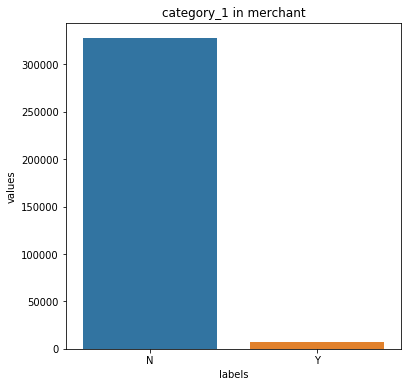

In [40]:
temp = merchant["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

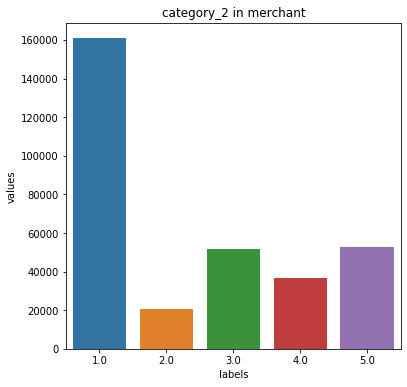

In [41]:
temp = merchant["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

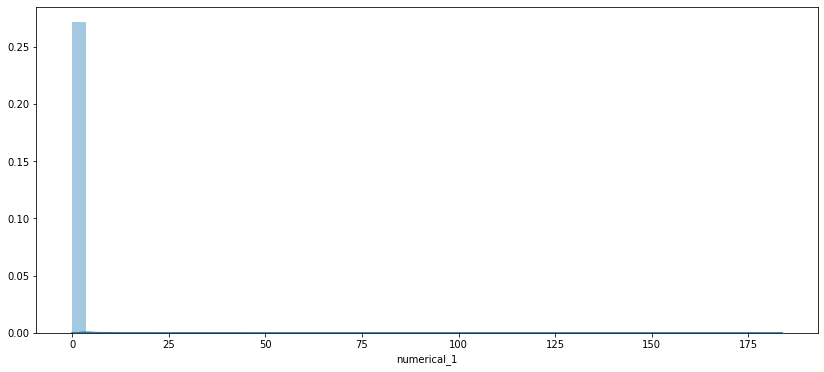

In [42]:
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_1'])


In [43]:
new_merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/new_merchant_transactions.csv")


In [44]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [45]:
total2 = new_merchant.isnull().sum().sort_values(ascending = False)
percent2 = (new_merchant.isnull().sum()/new_merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total2, percent2], axis=1, keys=['Total2', 'Percent2'])
missing_data.head(20)

,Total2,Percent2
category_2,111745,5.692473
category_3,55922,2.848758
merchant_id,26216,1.335486
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


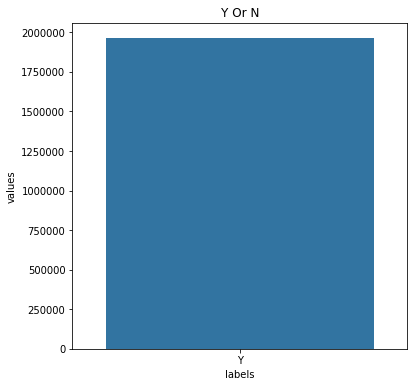

In [46]:
temp = new_merchant["authorized_flag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

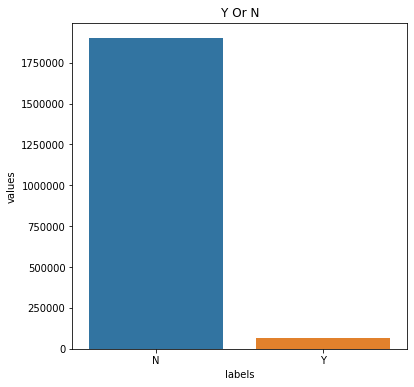

In [47]:
temp = new_merchant["category_1"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()


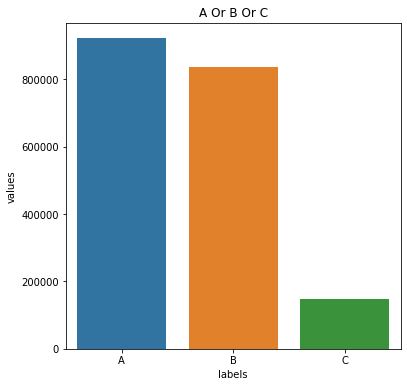

In [48]:
temp = new_merchant["category_3"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('A Or B Or C')
sns.barplot(x='labels', y='values', data=df)
plt.show()

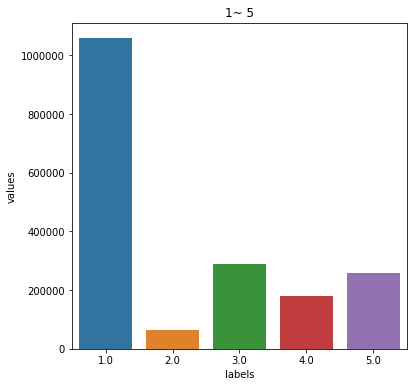

In [49]:
temp = new_merchant["category_2"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

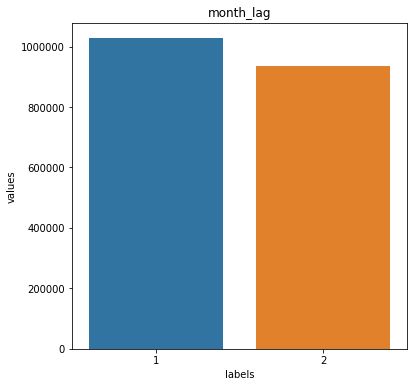

In [50]:
temp = new_merchant["month_lag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('month_lag')
sns.barplot(x='labels', y='values', data=df)
plt.show()

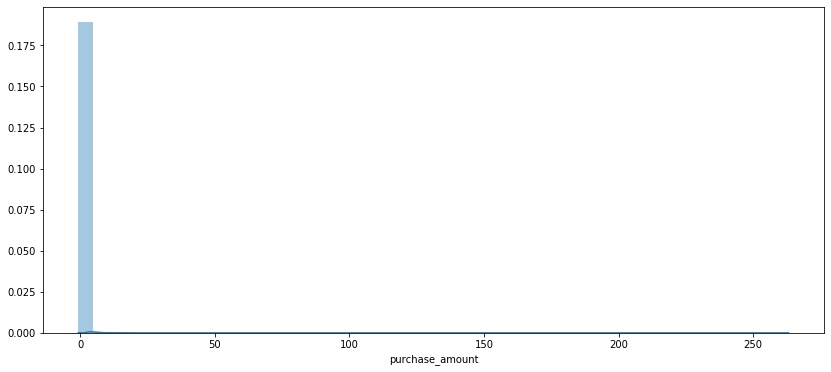

In [51]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(new_merchant['purchase_amount'])

In [52]:
new_merchant['authorized_flag']=new_merchant['authorized_flag'].map({'Y':1, 'N':0})
new_merchant['category_1']=new_merchant['category_1'].map({'Y':1, 'N':0})

In [53]:
new_merchant.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_415bb3a509,107,0,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,1,C_ID_415bb3a509,140,0,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,1,C_ID_415bb3a509,330,0,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,1,C_ID_415bb3a509,-1,1,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,1,C_ID_ef55cf8d4b,-1,1,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [54]:
def aggregate_new_transactions(new_trans):   
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip()
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
   
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
   
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
   
    return agg_new_trans

new_trans = aggregate_new_transactions(new_merchant)

In [72]:
train=pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, new_trans, on='card_id', how='left')

KeyError: 'card_id'

In [56]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_transactions_count_x,hist_authorized_flag_sum_x,hist_authorized_flag_mean_x,hist_merchant_id_nunique_x,...,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,247,0.950000,94,...,-0.296112,-0.724368,0.135812,0.0,0.0,0.0,0.0,0.000000,1.0,2.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,339,0.968571,142,...,-0.701858,-0.739410,0.014326,6.0,1.0,1.0,1.0,0.000000,1.0,2.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,41,0.953488,13,...,-0.700326,-0.700326,NaN,0.0,0.0,0.0,0.0,NaN,2.0,2.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,77,1.000000,50,...,-0.566740,-0.734135,0.065882,5.0,1.0,1.0,-1.0,0.755929,1.0,2.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,128,0.962406,66,...,0.450886,-0.739395,0.223821,35.0,1.0,2.0,-1.0,0.376913,1.0,2.0


In [57]:
use_cols = [col for col in train.columns if col not in ['card_id', 'first_active_month']]

In [58]:
train = train[use_cols]
test = test[use_cols]

In [59]:
train.head()


,feature_1,feature_2,feature_3,target,hist_transactions_count_x,hist_authorized_flag_sum_x,hist_authorized_flag_mean_x,hist_merchant_id_nunique_x,hist_city_id_nunique_x,hist_purchase_amount_sum_x,...,hist_purchase_amount_min_y,hist_purchase_amount_std_y,hist_installments_sum_y,hist_installments_median_y,hist_installments_max_y,hist_installments_min_y,hist_installments_std_y,hist_purchase_date_ptp_y,hist_month_lag_min_y,hist_month_lag_max_y
0,5,2,1,-0.820283,260,247,0.950000,94,7,-165.968735,...,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0
1,4,1,0,0.392913,350,339,0.968571,142,9,-210.006332,...,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0
2,2,2,0,0.688056,43,41,0.953488,13,5,-29.167391,...,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0
3,4,3,0,0.142495,77,77,1.000000,50,7,-49.491364,...,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0
4,1,3,0,-0.159749,133,128,0.962406,66,6,-48.687656,...,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0


In [60]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'target',
       'hist_transactions_count_x', 'hist_authorized_flag_sum_x',
       'hist_authorized_flag_mean_x', 'hist_merchant_id_nunique_x',
       'hist_city_id_nunique_x', 'hist_purchase_amount_sum_x',
       'hist_purchase_amount_median_x', 'hist_purchase_amount_max_x',
       'hist_purchase_amount_min_x', 'hist_purchase_amount_std_x',
       'hist_installments_sum_x', 'hist_installments_median_x',
       'hist_installments_max_x', 'hist_installments_min_x',
       'hist_installments_std_x', 'hist_purchase_date_ptp_x',
       'hist_month_lag_min_x', 'hist_month_lag_max_x',
       'hist_transactions_count_y', 'hist_authorized_flag_sum_y',
       'hist_authorized_flag_mean_y', 'hist_merchant_id_nunique_y',
       'hist_city_id_nunique_y', 'hist_purchase_amount_sum_y',
       'hist_purchase_amount_median_y', 'hist_purchase_amount_max_y',
       'hist_purchase_amount_min_y', 'hist_purchase_amount_std_y',
       'hist_installments_sum_y', 

In [61]:
test.head()

,feature_1,feature_2,feature_3,target,hist_transactions_count_x,hist_authorized_flag_sum_x,hist_authorized_flag_mean_x,hist_merchant_id_nunique_x,hist_city_id_nunique_x,hist_purchase_amount_sum_x,...,hist_purchase_amount_min_y,hist_purchase_amount_std_y,hist_installments_sum_y,hist_installments_median_y,hist_installments_max_y,hist_installments_min_y,hist_installments_std_y,hist_purchase_date_ptp_y,hist_month_lag_min_y,hist_month_lag_max_y
0,5,2,1,-0.820283,260,247,0.950000,94,7,-165.968735,...,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0
1,4,1,0,0.392913,350,339,0.968571,142,9,-210.006332,...,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0
2,2,2,0,0.688056,43,41,0.953488,13,5,-29.167391,...,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0
3,4,3,0,0.142495,77,77,1.000000,50,7,-49.491364,...,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0
4,1,3,0,-0.159749,133,128,0.962406,66,6,-48.687656,...,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0


In [62]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn import preprocessing
from sklearn import utils


In [64]:
param = {'num_leaves': 129,
         'min_data_in_leaf': 148, 
         'objective':'regression',
         'max_depth': 9,
         'learning_rate': 0.005,
         "min_child_samples": 24,
         "boosting": "gbdt",
         "feature_fraction": 0.7202,
         "bagging_freq": 1,
         "bagging_fraction": 0.8125 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.3468,
         "verbosity": -1}

In [65]:
y=train['target']
x=train.drop('target', axis=1)

In [66]:
y     = train['target']
train = train.drop(['target'],axis=1)
test  = test.drop(['target'],axis=1)

In [67]:
nfolds=10
folds = KFold(n_splits=5, shuffle=True, random_state=1234)

In [71]:
feature_importance_df = np.zeros((train.shape[1], nfolds))
mvalid = np.zeros(len(train))
mfull  = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, train.values)):
    print('----')
    print("fold n°{}".format(fold_))
    
    x0,y0 = train.iloc[trn_idx], y[trn_idx]
    x1,y1 = train.iloc[val_idx], y[val_idx]
    
    trn_data = lgb.Dataset(x0, label= y0); val_data = lgb.Dataset(x1, label= y1)
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=100, early_stopping_rounds = 150)
    mvalid[val_idx] = clf.predict(x1, num_iteration=clf.best_iteration)
    
    feature_importance_df[:, fold_] = clf.feature_importance()
    
    mfull += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits
    
np.sqrt(mean_squared_error(mvalid, y))

----
fold n°0
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 3.82734	valid_1's rmse: 3.77116
[200]	training's rmse: 3.80382	valid_1's rmse: 3.76175
[300]	training's rmse: 3.78802	valid_1's rmse: 3.75794
[400]	training's rmse: 3.77554	valid_1's rmse: 3.75638
[500]	training's rmse: 3.7662	valid_1's rmse: 3.75587
[600]	training's rmse: 3.75768	valid_1's rmse: 3.75593
[700]	training's rmse: 3.75053	valid_1's rmse: 3.75598
Early stopping, best iteration is:
[561]	training's rmse: 3.76094	valid_1's rmse: 3.75578
----
fold n°1
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 3.78776	valid_1's rmse: 3.9342
[200]	training's rmse: 3.76387	valid_1's rmse: 3.92422
[300]	training's rmse: 3.7472	valid_1's rmse: 3.92
[400]	training's rmse: 3.73435	valid_1's rmse: 3.91797
[500]	training's rmse: 3.72401	valid_1's rmse: 3.91678
[600]	training's rmse: 3.71524	valid_1's rmse: 3.91659
[700]	training's rmse: 3.70824	valid_1's rmse: 3.

3.8147091424418687

In [ ]:
from sklearn.model_selection import train_test_split

 

X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1234)

 

print(X_train.shape, X_test.shape)

 

print(y_train.shape, y_test.shape)

from lightgbm import LGBMRegressor

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

print(X_train.shape, training_scores_encoded.shape)

lgb =LGBMClassifier(n_estimators= 100)

lgb.fit(X_train.shape,training_scores_encoded.shape)

In [70]:
print(train.shape[1])

39
